In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
medical_df = pd.read_csv('medical_examination.csv')
medical_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
medical_df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [4]:
# Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing
# their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight.
# Use the value 0 for NOT overweight and the value 1 for overweight.

# weight is kg
# change height from cm -> m

medical_df['overweight'] = (medical_df['weight'] / ((medical_df['height']/100)**2)).apply(lambda x: 1 if x > 25 else 0)
medical_df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,1
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,1
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,1
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,1


In [5]:
# Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0.
# If the value is more than 1, make the value 1.

medical_df['cholesterol'] = medical_df['cholesterol'].apply(lambda x: 1 if x == 1 else 0)
medical_df['gluc'] = medical_df['gluc'].apply(lambda x: 0 if x == 1 else 1)
medical_df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,0,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,0,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,0,0,0,0,0,0
5,8,21914,1,151,67.0,120,80,0,1,0,0,0,0,1
6,9,22113,1,157,93.0,130,80,0,0,0,0,1,0,1
7,12,22584,2,178,95.0,130,90,0,1,0,0,1,1,1
8,13,17668,1,158,71.0,110,70,1,0,0,0,1,0,1
9,14,19834,1,164,68.0,110,60,1,0,0,0,0,0,1


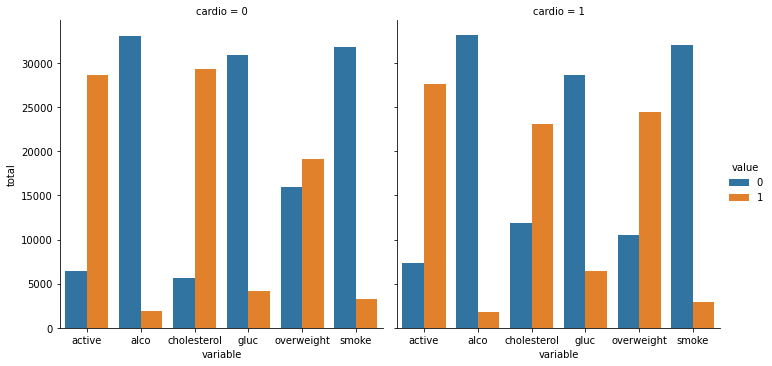

In [6]:
# Convert the data into long format and create a chart that shows the value counts of the categorical features
# using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value.
# The chart should look similar to bar graph

# STEP 1
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco'
# 'active', and 'overweight'.
df_cat = pd.melt(medical_df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight'])

# STEP 2
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature.
# You will have to rename one of the columns for the catplot to work correctly.
df_cat = pd.DataFrame(df_cat.groupby(['variable', 'value', 'cardio'])['value'].count()).rename(columns={'value': 'total'}).reset_index()

# STEP 3
# Draw the catplot with 'sns.catplot()'
fig = sns.catplot(x='variable', y='total', hue='value', kind='bar', data=df_cat, col='cardio').fig

In [7]:
# Clean the data as follws:
# diastolic pressure is higher than systolic
# height is less than the 2.5th percentile
# height is less than the 2.5th percentile
# height is more than the 97.5th percentile
# weight is less than the 2.5th percentile
clean_data = medical_df[(medical_df['ap_lo'] <= medical_df['ap_hi']) & (medical_df['height'] >= medical_df['height'].quantile(0.025)) & (medical_df['height'] >= medical_df['height'].quantile(0.025)) & (medical_df['height'] <= medical_df['height'].quantile(0.975)) & (medical_df['weight'] >= medical_df['weight'].quantile(0.025)) & (medical_df['weight'] <= medical_df['weight'].quantile(0.975))]

<AxesSubplot:>

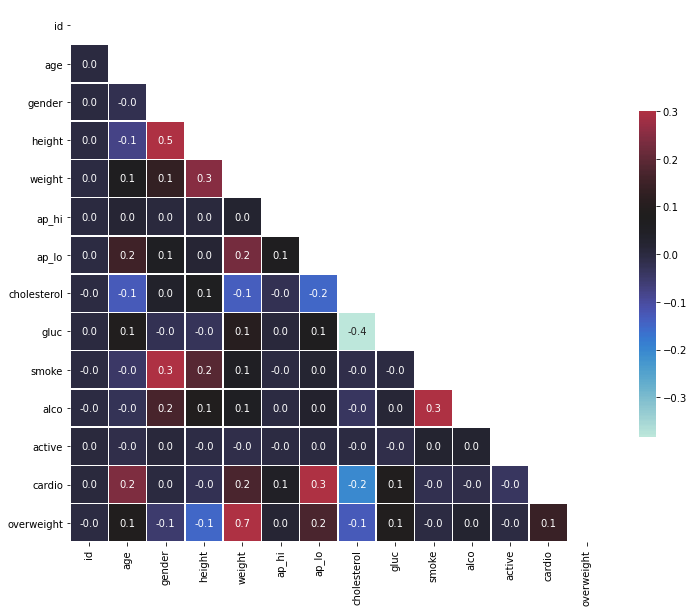

In [8]:
# Create a correlation matrix using the dataset.
corr = clean_data.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(corr)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=[12,12])

# Plot the correlation matrix using seaborn's heatmap()
sns.heatmap(corr, square = True, mask = mask, linewidths=.5, annot = True, center = 0.08, fmt='.1f', cbar_kws= {'shrink':0.5}, vmax=.3)